In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

## Cleaning the dataset

In [2]:
def clean_df(df):
    df.drop_duplicates(subset =["title", 'show_id'], inplace = True)
    df.dropna(subset = ["date_added"], inplace = True)
    df['date_added'] = df['date_added'].str.replace(',', '')
    df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d %Y', errors='coerce', dayfirst=False)
    df['date_added'].fillna(method='ffill', inplace=True)  # Forward fill NaT values
    df['year_added'] = df['date_added'].dt.year
    df.sort_values(by = 'year_added', inplace = True)
    df.fillna(method='ffill', inplace=True)

In [3]:
df = pd.read_csv("netflix_movies (1).csv")
clean_df(df)

C:\Users\Shagun\AppData\Local\Temp\ipykernel_22784\3235675304.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(method='ffill', inplace=True)  # Forward fill NaT values
C:\Users\Shagun\AppData\Local\Temp\ipykernel_22784\3235675304.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'].fillna(method='ffill', inplace=True)  # Forward fill NaT values
C:\Users\Shagun\AppData\Local\Temp\ipykernel_22784\32

In [ ]:
display(df)

## EDA

In [4]:
df['year_added'].nunique()

14

<Axes: xlabel='year_added'>

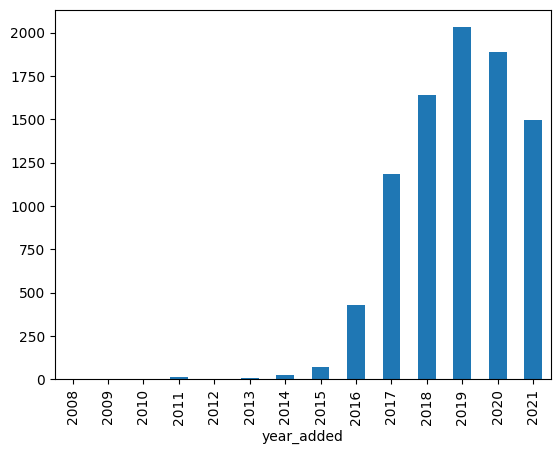

In [5]:
df['year_added'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='type'>

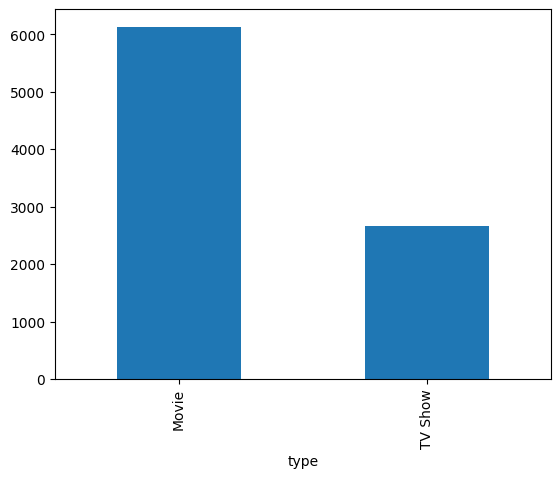

In [6]:
df['type'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='year_added'>

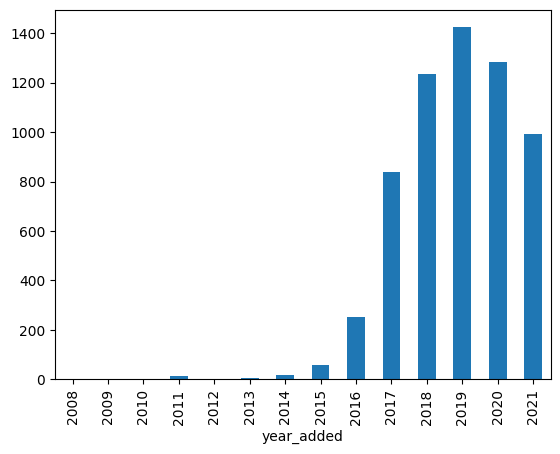

In [7]:
df[df['type'] == 'Movie']['year_added'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='year_added'>

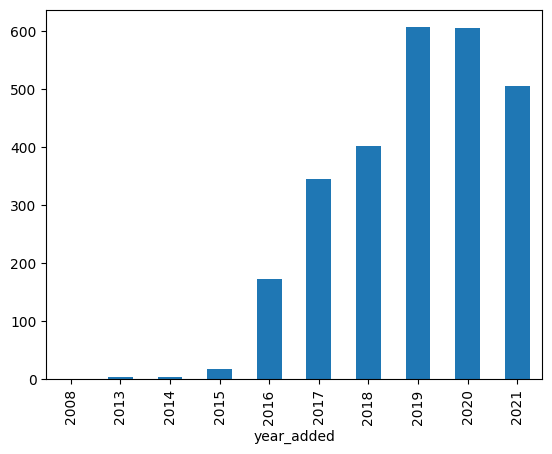

In [8]:
df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index().plot(kind='bar')

In [9]:
# Count occurrences of "India"
df['contains_india'] = df['country'].apply(lambda x: 'India' in x)
india_count = df['contains_india'].sum()
print(f"India appears in {india_count} movies or TV shows")

India appears in 1149 movies or TV shows


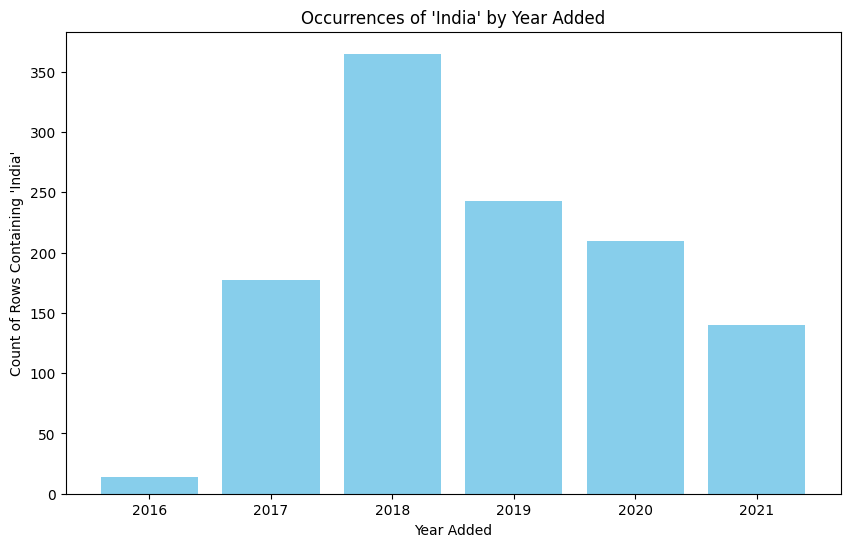

In [10]:
# Group by 'year_added' and count the occurrences where 'contains_india' is True
india_counts_by_year = df[df['contains_india']].groupby('year_added').size()

# Plotting with matplotlib
plt.figure(figsize=(10, 6))
plt.bar(india_counts_by_year.index, india_counts_by_year.values, color='skyblue')
plt.xlabel('Year Added')
plt.ylabel("Count of Rows Containing 'India'")
plt.title("Occurrences of 'India' by Year Added")
plt.xticks(india_counts_by_year.index)
plt.show()